In [2]:
! pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 MB 24.5 MB/s eta 0:00:0000:0100:01


In [ ]:
# Source : https://theailearner.com/2019/05/07/add-different-noise-to-an-image/

import cv2
import numpy as np
from skimage.util import random_noise

# Load the image
img = cv2.imread("/Users/reza/EVERYTHING/Work/ML Book/Figs/CH16/chamelon.png")

# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='s&p',amount=0.3)

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')


cv2.imshow('blur',noise_img)
cv2.waitKey(0)


In [ ]:

import cv2
import numpy as np
from skimage.util import random_noise

# Load the image
img = cv2.imread("/Users/reza/EVERYTHING/Work/ML Book/Figs/CH16/chamelon.png")

# Add salt-and-pepper noise to the image.
noise_img = random_noise(img, mode='gaussian')

# The above function returns a floating-point image
# on the range [0, 1], thus we changed it to 'uint8'
# and from [0,255]
noise_img = np.array(255*noise_img, dtype = 'uint8')


cv2.imshow('blur',noise_img)
cv2.waitKey(0)



In [ ]:
# Gamma

from scipy.stats import gamma
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)

a = 1.99
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'b-', lw=2, alpha=0.6, label='gamma pdf')

In [ ]:
# Gaussian

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


In [ ]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

ax = sns.distplot(data_expon,
                  bins=100)

In [ ]:
# pip install perlin-noise
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

noise = PerlinNoise(octaves=10, seed=1)
xpix, ypix = 200, 200
pic = [[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)]

plt.imshow(pic, cmap='gray')
plt.show()

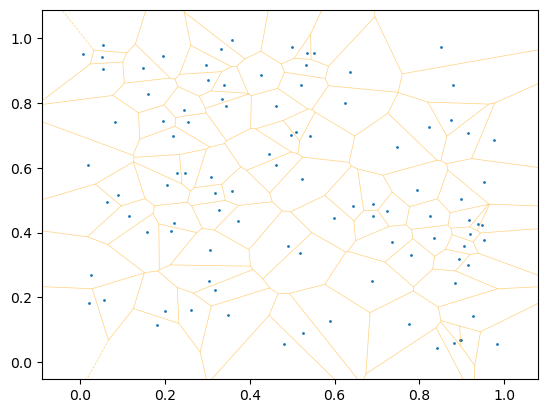

In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Generate random points
points = np.random.rand(100, 2)

# Compute Voronoi tessellation
vor = Voronoi(points)

# Plot Voronoi diagram
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                      line_width=0.5, line_alpha=0.5, point_size=2)
plt.show()

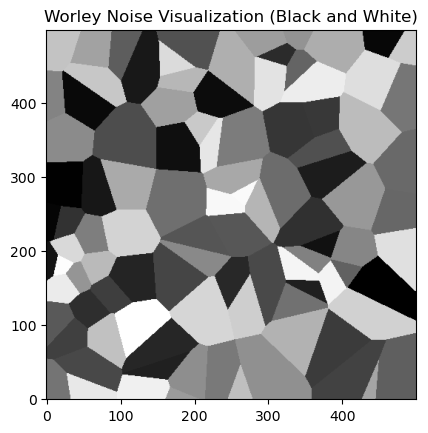

In [3]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

def generate_worley_noise(num_points, width, height):
    # Generate random seed points
    seed_points = np.random.rand(num_points, 2) * np.array([width, height])

    # Perform Voronoi tessellation
    vor = Voronoi(seed_points)

    # Initialize an array to store the cell indices
    cell_indices = np.zeros((width, height), dtype=int)

    # Assign each pixel to the index of the nearest Voronoi cell
    for i in range(width):
        for j in range(height):
            distance_to_cells = np.linalg.norm(seed_points - np.array([i, j]), axis=1)
            cell_indices[i, j] = np.argmin(distance_to_cells)

    return cell_indices

def visualize_worley_noise(cell_indices):
    plt.imshow(cell_indices, cmap='binary', origin='lower')
    plt.title('Worley Noise Visualization (Black and White)')
    plt.show()

# Set parameters
num_points = 100
width, height = 500, 500

# Generate Worley noise
worley_noise = generate_worley_noise(num_points, width, height)

# Visualize Worley noise in black and white
visualize_worley_noise(worley_noise)


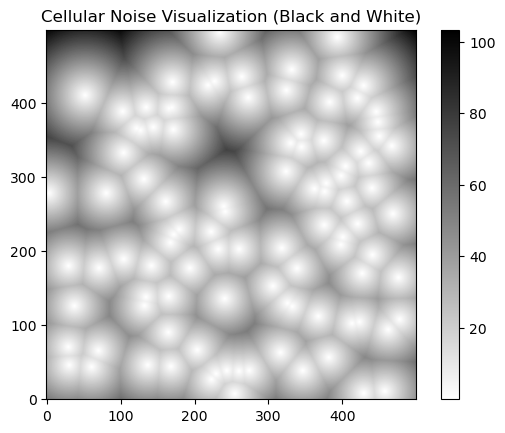

In [4]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

def generate_cellular_noise(num_points, width, height):
    # Generate random seed points
    seed_points = np.random.rand(num_points, 2) * np.array([width, height])

    # Perform Voronoi tessellation
    vor = Voronoi(seed_points)

    # Initialize an array to store the distances to the nearest seed points
    distances = np.zeros((width, height))

    # Compute distances to the nearest seed points for each pixel
    for i in range(width):
        for j in range(height):
            distance_to_cells = np.linalg.norm(seed_points - np.array([i, j]), axis=1)
            distances[i, j] = np.min(distance_to_cells)

    return distances

def visualize_cellular_noise(distances):
    plt.imshow(distances, cmap='binary', origin='lower')
    plt.title('Cellular Noise Visualization (Black and White)')
    plt.colorbar()
    plt.show()

# Set parameters
num_points = 100
width, height = 500, 500

# Generate cellular noise
cellular_noise = generate_cellular_noise(num_points, width, height)

# Visualize cellular noise in black and white
visualize_cellular_noise(cellular_noise)


In [7]:
!pip install noise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp310-cp310-macosx_10_9_x86_64.whl size=23747 sha256=645bec8db397daf00f91f1629e40b3ff451a6c0be7b17941de2e82ffeaeab9e2
  Stored in directory: /Users/reza/Library/Caches/pip/wheels/06/c6/29/4ac75ff0787388db93d13a07647051285f62017e752e1d88fb
Successfully built noise


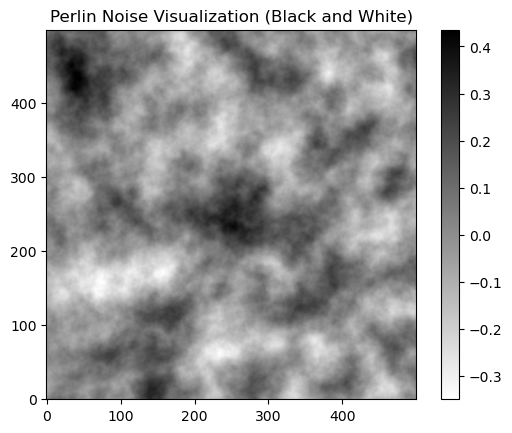

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import noise

def generate_perlin_noise(width, height, scale=100.0, octaves=6, persistence=0.5, lacunarity=2.0, seed=None):
    world = np.zeros((width, height))

    for i in range(width):
        for j in range(height):
            world[i][j] = noise.pnoise2(i/scale,
                                         j/scale,
                                         octaves=octaves,
                                         persistence=persistence,
                                         lacunarity=lacunarity,
                                         repeatx=1024,
                                         repeaty=1024,
                                         base=seed)

    return world

def visualize_perlin_noise(perlin_noise):
    plt.imshow(perlin_noise, cmap='binary', origin='lower')
    plt.title('Perlin Noise Visualization (Black and White)')
    plt.colorbar()
    plt.show()

# Set parameters
width, height = 500, 500
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = 42  # You can change the seed to get different patterns

# Generate Perlin noise
perlin_noise = generate_perlin_noise(width, height, scale, octaves, persistence, lacunarity, seed)

# Visualize Perlin noise in black and white
visualize_perlin_noise(perlin_noise)


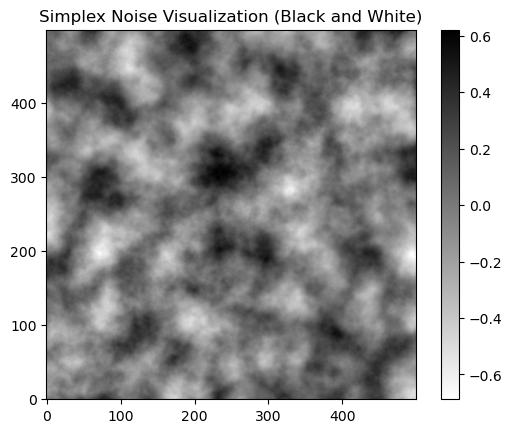

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import noise

def generate_simplex_noise(width, height, scale=100.0, octaves=6, persistence=0.5, lacunarity=2.0, seed=None):
    world = np.zeros((width, height))

    for i in range(width):
        for j in range(height):
            world[i][j] = noise.snoise2(i/scale,
                                         j/scale,
                                         octaves=octaves,
                                         persistence=persistence,
                                         lacunarity=lacunarity,
                                         repeatx=1024,
                                         repeaty=1024,
                                         base=seed)

    return world

def visualize_simplex_noise(simplex_noise):
    plt.imshow(simplex_noise, cmap='binary', origin='lower')
    plt.title('Simplex Noise Visualization (Black and White)')
    plt.colorbar()
    plt.show()

# Set parameters
width, height = 500, 500
scale = 100.0
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = 56  # You can change the seed to get different patterns

# Generate Simplex noise
simplex_noise = generate_simplex_noise(width, height, scale, octaves, persistence, lacunarity, seed)

# Visualize Simplex noise in black and white
visualize_simplex_noise(simplex_noise)


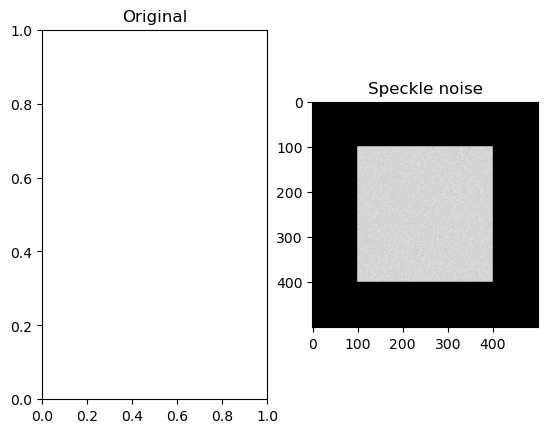

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

# Generate a sample image
img = np.zeros((500, 500))
img[100:400, 100:400] = 1

# Add speckle noise
row, col = img.shape
sigma = 0.05
gauss = np.random.randn(row,col) * sigma
gauss = gauss.reshape(row,col) 
noisy = img + img * gauss

# Display original and noisy images
fig, (ax1, ax2) = plt.subplots(1, 2)
#ax1.imshow(img, cmap='gray')
ax2.imshow(noisy, cmap='gray')

ax1.set_title('Original')
ax2.set_title('Speckle noise')

plt.show()